**Business Problem: Predicting Flight Cancellations**

**Background:**
An airline company is facing challenges with flight cancellations, resulting in financial losses, customer dissatisfaction, and operational disruptions. Frequent cancellations lead to increased costs, loss of revenue, and a negative impact on the airline's reputation. The company aims to implement a proactive solution to predict and reduce the likelihood of flight cancellations.

**Objective:**
Develop a machine learning model that accurately predicts the probability of a flight being canceled based on historical data, enabling the airline to take preemptive measures to minimize cancellations and optimize its operations.

**Dataset:**
The dataset includes historical information on flights, airports, weather conditions, air traffic, and other relevant features. Key attributes include flight details (departure time, arrival time, airline, etc.), weather data, airport information, and any previous cancellation incidents.

**Challenges:**
1. **Imbalanced Classes:** The dataset is likely to have imbalanced classes, as flight cancellations are relatively rare compared to successful flights. Handling this class imbalance is crucial for model training and evaluation.

2. **Temporal Dynamics:** Flight cancellations may exhibit temporal patterns influenced by factors such as seasons, holidays, or specific days of the week. Capturing these temporal dynamics is essential for accurate predictions.

3. **Weather Dependency:** Weather conditions play a significant role in flight cancellations. Incorporating real-time weather data and understanding its impact on cancellations is vital.

4. **Operational Factors:** Factors such as airport congestion, air traffic control issues, and aircraft maintenance can contribute to cancellations. These operational aspects need to be considered for a comprehensive model.

**Expected Outcomes:**
1. A machine learning model capable of predicting the probability of flight cancellations for individual flights.
   
2. Insights into the most influential factors contributing to cancellations, allowing the airline to prioritize and address specific issues.

3. Proactive decision-making tools for airline staff to take preventive measures, such as rescheduling, notifying passengers in advance, and optimizing resource allocation.

4. Reduced financial losses, improved operational efficiency, and enhanced customer satisfaction by minimizing the impact of cancellations.

**Success Criteria:**
The machine learning model should achieve a high area under the ROC curve (AUC-ROC) or precision-recall curve, indicating its ability to discriminate between canceled and non-canceled flights effectively. Additionally, the model should be interpretable, allowing stakeholders to understand the key features influencing cancellation predictions.

In [18]:
import pandas as pd 
#from ydata_profiling import ProfileReport
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats 
#from fancyimpute import KNN
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
#from xgboost import XGBClassifier
import plotly.express as px
from sklearn.metrics import f1_score,classification_report
import sys
sys.setrecursionlimit(100000000)  # Set a higher recursion limit (adjust as needed)
import imblearn
from collections import Counter
from imblearn.under_sampling import ClusterCentroids 

## Below is primary dataset 

In [249]:
Flight = pd.read_csv('flight.csv')
Flight  

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,-2.0,10.0,1750.0,1845.0,6.0,1907,1851.0,-16.0,0.0,NaN,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,-6.0,10.0,1304.0,1514.0,5.0,1556,1519.0,-37.0,0.0,NaN,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615.0,41.0,16.0,631.0,759.0,6.0,729,805.0,36.0,0.0,NaN,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",1600,1555.0,-5.0,19.0,1614.0,1704.0,8.0,1728,1712.0,-16.0,0.0,NaN,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN


In [31]:
Flight.shape # checking dimensions 

(3000000, 32)

# ADD IN REPORT 30000 SAMPLES ARE WITHDRAWN

In [250]:
df = Flight.sample(30000)

In [5]:
df['AIRLINE_CODE'].unique()

array(['UA', 'AS', 'WN', 'B6', 'F9', 'DL', 'NK', 'OO', 'AA', 'MQ', 'G4',
       'QX', '9E', 'YX', 'YV', 'OH', 'HA', 'EV'], dtype=object)

In [10]:
df['AIRLINE'].value_counts(normalize=True)

Southwest Airlines Co.                0.192108
Delta Air Lines Inc.                  0.131538
American Airlines Inc.                0.127719
SkyWest Airlines Inc.                 0.114960
United Air Lines Inc.                 0.085026
Republic Airline                      0.047441
Envoy Air                             0.040523
Endeavor Air Inc.                     0.037667
JetBlue Airways                       0.037594
PSA Airlines Inc.                     0.035884
Alaska Airlines Inc.                  0.033460
Spirit Air Lines                      0.031834
Mesa Airlines Inc.                    0.021794
Frontier Airlines Inc.                0.021189
Allegiant Air                         0.017400
Hawaiian Airlines Inc.                0.010632
Horizon Air                           0.006870
ExpressJet Airlines LLC d/b/a aha!    0.006361
Name: AIRLINE, dtype: float64

In [11]:
df['AIRLINE'].nunique()

18

In [12]:
df['AIRLINE'].unique()

array(['JetBlue Airways', 'Delta Air Lines Inc.',
       'Southwest Airlines Co.', 'SkyWest Airlines Inc.',
       'Republic Airline', 'United Air Lines Inc.', 'PSA Airlines Inc.',
       'American Airlines Inc.', 'Hawaiian Airlines Inc.',
       'Allegiant Air', 'Envoy Air', 'Alaska Airlines Inc.',
       'Frontier Airlines Inc.', 'Endeavor Air Inc.', 'Spirit Air Lines',
       'Mesa Airlines Inc.', 'Horizon Air',
       'ExpressJet Airlines LLC d/b/a aha!'], dtype=object)

In [13]:
df['AIRLINE_DOT'].nunique()

18

In [14]:
df['AIRLINE_DOT'].unique()

array(['JetBlue Airways: B6', 'Delta Air Lines Inc.: DL',
       'Southwest Airlines Co.: WN', 'SkyWest Airlines Inc.: OO',
       'Republic Airline: YX', 'United Air Lines Inc.: UA',
       'PSA Airlines Inc.: OH', 'American Airlines Inc.: AA',
       'Hawaiian Airlines Inc.: HA', 'Allegiant Air: G4', 'Envoy Air: MQ',
       'Alaska Airlines Inc.: AS', 'Frontier Airlines Inc.: F9',
       'Endeavor Air Inc.: 9E', 'Spirit Air Lines: NK',
       'Mesa Airlines Inc.: YV', 'Horizon Air: QX',
       'ExpressJet Airlines LLC d/b/a aha!: EV'], dtype=object)

In [15]:
df['AIRLINE_DOT'].value_counts(normalize=True)

Southwest Airlines Co.: WN                0.192108
Delta Air Lines Inc.: DL                  0.131538
American Airlines Inc.: AA                0.127719
SkyWest Airlines Inc.: OO                 0.114960
United Air Lines Inc.: UA                 0.085026
Republic Airline: YX                      0.047441
Envoy Air: MQ                             0.040523
Endeavor Air Inc.: 9E                     0.037667
JetBlue Airways: B6                       0.037594
PSA Airlines Inc.: OH                     0.035884
Alaska Airlines Inc.: AS                  0.033460
Spirit Air Lines: NK                      0.031834
Mesa Airlines Inc.: YV                    0.021794
Frontier Airlines Inc.: F9                0.021189
Allegiant Air: G4                         0.017400
Hawaiian Airlines Inc.: HA                0.010632
Horizon Air: QX                           0.006870
ExpressJet Airlines LLC d/b/a aha!: EV    0.006361
Name: AIRLINE_DOT, dtype: float64

In [16]:
df['AIRLINE_CODE'].unique()

array(['B6', 'DL', 'WN', 'OO', 'YX', 'UA', 'OH', 'AA', 'HA', 'G4', 'MQ',
       'AS', 'F9', '9E', 'NK', 'YV', 'QX', 'EV'], dtype=object)

In [17]:
df['AIRLINE_CODE'].nunique()

18

In [18]:
df['AIRLINE_CODE'].value_counts(normalize=True)

WN    0.192108
DL    0.131538
AA    0.127719
OO    0.114960
UA    0.085026
YX    0.047441
MQ    0.040523
9E    0.037667
B6    0.037594
OH    0.035884
AS    0.033460
NK    0.031834
YV    0.021794
F9    0.021189
G4    0.017400
HA    0.010632
QX    0.006870
EV    0.006361
Name: AIRLINE_CODE, dtype: float64

In [19]:
df['ORIGIN'].nunique()

380

In [21]:
df['ORIGIN'].unique()

array(['MCO', 'FLL', 'SMF', 'OKC', 'CVG', 'IAD', 'BUR', 'CLT', 'TUL',
       'LAS', 'OGG', 'BWI', 'EUG', 'LAX', 'COS', 'MSP', 'DFW', 'CMI',
       'DCA', 'ORD', 'MKE', 'LGA', 'EWR', 'ATL', 'PHX', 'SEA', 'GEG',
       'KOA', 'DEN', 'BZN', 'SAT', 'ALB', 'ECP', 'ELP', 'PIE', 'IAH',
       'MIA', 'DAY', 'BNA', 'HOU', 'PNS', 'MCI', 'PWM', 'DAL', 'STT',
       'DTW', 'JAN', 'ICT', 'SFO', 'CLE', 'HLN', 'MBS', 'PIT', 'SJC',
       'RSW', 'KTN', 'SBN', 'GNV', 'SLC', 'GJT', 'CHS', 'MDW', 'OAJ',
       'AUS', 'PHL', 'OMA', 'BTR', 'MYR', 'PDX', 'XNA', 'SAN', 'CHO',
       'STL', 'RDU', 'PVD', 'SJU', 'CRW', 'SNA', 'RIC', 'TPA', 'EKO',
       'PSP', 'SFB', 'MHT', 'ITO', 'ATW', 'SHV', 'SBP', 'MRY', 'IND',
       'VPS', 'MFR', 'MGM', 'MSY', 'PSC', 'MSN', 'OAK', 'GSO', 'PIA',
       'LBB', 'HRL', 'BOS', 'ORH', 'SCE', 'LIT', 'LEX', 'DSM', 'SAV',
       'CAE', 'LGB', 'SWO', 'ABQ', 'VEL', 'BFL', 'MOB', 'HSV', 'BTV',
       'PLN', 'CMH', 'MSO', 'ONT', 'MAF', 'MEM', 'JAX', 'SBA', 'PBI',
       'SDF', 'HPN',

In [26]:
df['ORIGIN_CITY'].unique()

array(['Orlando, FL', 'Fort Lauderdale, FL', 'Sacramento, CA',
       'Oklahoma City, OK', 'Cincinnati, OH', 'Washington, DC',
       'Burbank, CA', 'Charlotte, NC', 'Tulsa, OK', 'Las Vegas, NV',
       'Kahului, HI', 'Baltimore, MD', 'Eugene, OR', 'Los Angeles, CA',
       'Colorado Springs, CO', 'Minneapolis, MN', 'Dallas/Fort Worth, TX',
       'Champaign/Urbana, IL', 'Chicago, IL', 'Milwaukee, WI',
       'New York, NY', 'Newark, NJ', 'Atlanta, GA', 'Phoenix, AZ',
       'Seattle, WA', 'Spokane, WA', 'Kona, HI', 'Denver, CO',
       'Bozeman, MT', 'San Antonio, TX', 'Albany, NY', 'Panama City, FL',
       'El Paso, TX', 'St. Petersburg, FL', 'Houston, TX', 'Miami, FL',
       'Dayton, OH', 'Nashville, TN', 'Pensacola, FL', 'Kansas City, MO',
       'Portland, ME', 'Dallas, TX', 'Charlotte Amalie, VI',
       'Detroit, MI', 'Jackson/Vicksburg, MS', 'Wichita, KS',
       'San Francisco, CA', 'Cleveland, OH', 'Helena, MT',
       'Saginaw/Bay City/Midland, MI', 'Pittsburgh, PA', 'San 

In [24]:
df['ORIGIN_CITY'].isnull().sum()

0

In [25]:
df['ORIGIN'].isnull().sum()

0

# Three features airline_code,airline,airline_dot contains same information,
# so we can keep only 1 column airline_code and drop remaining two

In [28]:
df['CANCELLATION_CODE'].unique()

array([nan, 'A', 'D', 'B', 'C'], dtype=object)

# ADD IN REPORT

<AxesSubplot:xlabel='CANCELLATION_CODE', ylabel='count'>

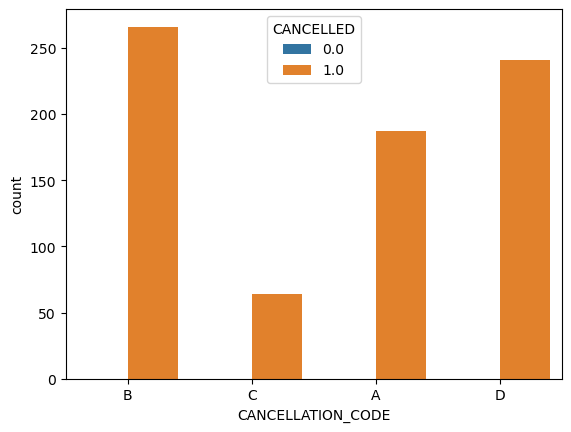

In [266]:
sns.countplot(df['CANCELLATION_CODE'],hue=df['CANCELLED'],data=df)

# B has highest cancellations

In [33]:
df['DELAY_DUE_CARRIER'].nunique()

968

In [34]:
df['DELAY_DUE_CARRIER'].unique()

array([      nan, 0.000e+00, 4.100e+01, 1.070e+02, 4.000e+00, 4.500e+01,
       3.000e+00, 3.500e+01, 3.740e+02, 3.700e+01, 3.400e+01, 1.000e+00,
       1.800e+01, 2.000e+01, 2.000e+00, 5.200e+01, 8.200e+01, 3.280e+02,
       7.000e+00, 5.400e+01, 2.200e+01, 9.800e+01, 4.200e+01, 7.500e+01,
       2.600e+01, 2.100e+01, 1.400e+01, 8.800e+01, 1.600e+01, 5.000e+00,
       3.300e+01, 3.100e+01, 6.300e+01, 7.700e+01, 9.000e+00, 1.500e+01,
       1.300e+01, 2.500e+01, 1.700e+01, 1.040e+03, 9.500e+01, 6.000e+00,
       2.700e+01, 7.400e+01, 7.200e+01, 1.300e+02, 1.220e+02, 7.600e+01,
       2.300e+01, 6.000e+01, 1.310e+02, 8.610e+02, 1.010e+02, 5.100e+01,
       1.000e+01, 6.170e+02, 1.740e+02, 2.450e+02, 1.650e+02, 8.000e+00,
       2.800e+01, 4.300e+01, 4.080e+02, 6.500e+01, 4.400e+01, 5.600e+01,
       1.150e+02, 6.700e+01, 6.200e+01, 2.030e+02, 9.100e+01, 2.400e+01,
       3.200e+01, 8.300e+01, 8.700e+01, 3.800e+01, 8.000e+01, 6.100e+01,
       1.900e+01, 3.000e+01, 6.900e+01, 8.150e+02, 

In [44]:
df['CANCELLATION_CODE'].value_counts()

B    9570
D    8212
A    6503
C    2115
Name: CANCELLATION_CODE, dtype: int64

In [37]:
df['CANCELLATION_CODE'].isnull().sum()

973600

In [38]:
df['DELAY_DUE_CARRIER'].isnull().sum()

821270

In [39]:
df['DELAY_DUE_LATE_AIRCRAFT'].isnull().sum()

821270

In [40]:
df['DELAY_DUE_NAS'].isnull().sum()

821270

In [41]:
df['DELAY_DUE_WEATHER'].isnull().sum()

821270

In [42]:
df['DELAY_DUE_SECURITY'].isnull().sum()

821270

In [43]:
df['CANCELLED'].value_counts()

0.0    973600
1.0     26400
Name: CANCELLED, dtype: int64

In [47]:
df['DIVERTED'].value_counts(normalize=True)

0.0    0.997564
1.0    0.002436
Name: DIVERTED, dtype: float64

<AxesSubplot:xlabel='CANCELLED', ylabel='DIVERTED'>

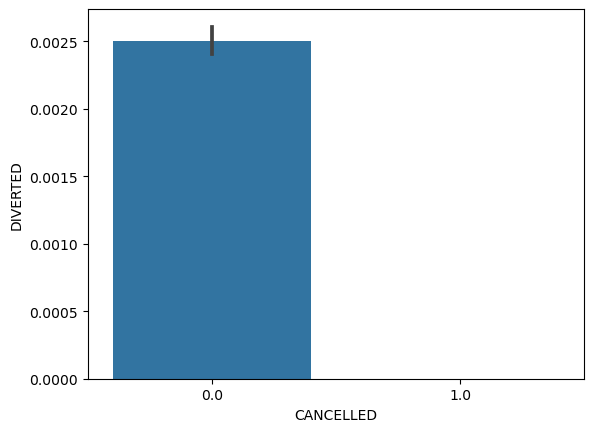

In [49]:
sns.barplot(x=df['CANCELLED'],y=df['DIVERTED'])

# Please add this test in report

In [48]:
group_a = df['CANCELLED'][df['DIVERTED'] == '0.0']
group_b = df['CANCELLED'][df['DIVERTED'] == '1.0']

In [49]:
t_statistic, p_value = stats.ttest_ind(group_a, group_b)


In [50]:
if p_value < 0.05:
    print("There is evidence to suggest a significant association between the numerical variable and the categorical variable")
else:
    print("There is no significant evidence to suggest an association between the numerical variable and the categorical variable.")

There is no significant evidence to suggest an association between the numerical variable and the categorical variable.


In [ ]:
#hence we can drop DIverted

In [55]:
df['AIRLINE_CODE'].value_counts()

WN    192108
DL    131538
AA    127719
OO    114960
UA     85026
YX     47441
MQ     40523
9E     37667
B6     37594
OH     35884
AS     33460
NK     31834
YV     21794
F9     21189
G4     17400
HA     10632
QX      6870
EV      6361
Name: AIRLINE_CODE, dtype: int64

df['DOT_CODE'].value_counts()

In [253]:
df['CANCELLED'].value_counts()

0.0    29242
1.0      758
Name: CANCELLED, dtype: int64

# add in report

<AxesSubplot:xlabel='AIRLINE_CODE', ylabel='count'>

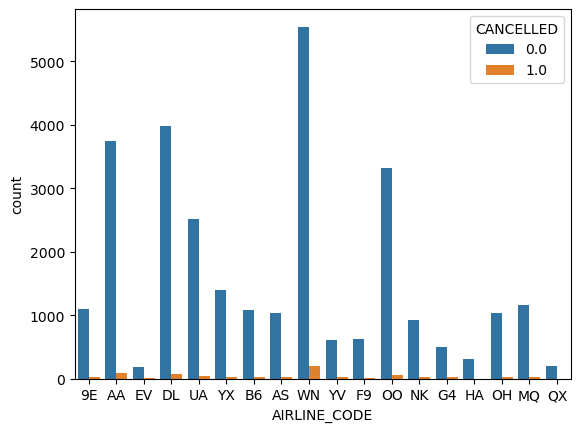

In [252]:
# WHICH AIRLNE HAS MAXIMUN CANCELLATIONS 
sns.countplot(x=df['AIRLINE_CODE'],hue=df['CANCELLED'])

#WN AIRLINE HAS HIGHEST CANCELLED FLIGHTS THAN OTHERS


# ADD BELOW IN REPORT

<AxesSubplot:xlabel='AIRLINE_CODE', ylabel='count'>

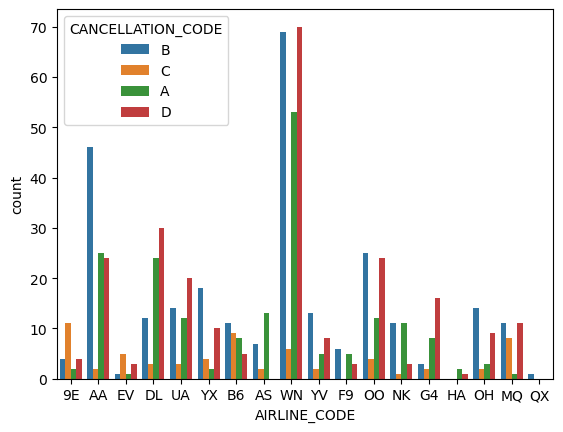

In [254]:
# REASONS BEHIND CANCELLATION

sns.countplot(x=df['AIRLINE_CODE'],hue=df['CANCELLATION_CODE'])

# WN MADEJAST CANCELLED THEN AA
# WN HAS HIGHEST CANCELLATION,REASON IS MAXIMUM D,THEN B
#AA made B maximum reason aahe,then D

In [92]:
df.sample(3)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
514594,2021-12-01,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,5864,SMF,"Sacramento, CA",LAX,"Los Angeles, CA",1951,1956.0,5.0,32.0,2028.0,2136.0,10.0,2133,2146.0,13.0,0.0,NaN,0.0,102.0,110.0,68.0,373.0,NaN,NaN,NaN,NaN,NaN
2316780,2019-02-14,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2327,SAN,"San Diego, CA",MDW,"Chicago, IL",1420,1527.0,67.0,14.0,1541.0,2045.0,3.0,2015,2048.0,33.0,0.0,NaN,0.0,235.0,201.0,184.0,1728.0,32.0,0.0,0.0,0.0,1.0
255733,2019-10-12,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,5388,DEN,"Denver, CO",MSO,"Missoula, MT",1355,1356.0,1.0,15.0,1411.0,1555.0,6.0,1609,1601.0,-8.0,0.0,NaN,0.0,134.0,125.0,104.0,679.0,NaN,NaN,NaN,NaN,NaN


In [256]:
df['CANCELLED'] = df['CANCELLED'].replace({0.0:0,1.0:1})

# add in repost dropped below columns as they are not useful to classfity the 
# target variable based on domain knowledge ,dropped them

In [133]:
df.drop(columns=['AIRLINE','AIRLINE_DOT','DOT_CODE','ORIGIN_CITY','DEST_CITY','DIVERTED','CRS_ARR_TIME','ARR_TIME','CRS_DEP_TIME','DEP_TIME','ELAPSED_TIME'],axis=1,inplace=True)

In [135]:
df['DELAY_DUE_CARRIER']=df['DELAY_DUE_CARRIER'].fillna(0)

In [136]:
df['DELAY_DUE_LATE_AIRCRAFT']=df['DELAY_DUE_LATE_AIRCRAFT'].fillna(0)
df['DELAY_DUE_NAS']=df['DELAY_DUE_NAS'].fillna(0)
df['DELAY_DUE_SECURITY']=df['DELAY_DUE_SECURITY'].fillna(0)
df['DELAY_DUE_WEATHER']=df['DELAY_DUE_WEATHER'].fillna(0)
df['CANCELLATION_CODE']=df['CANCELLATION_CODE'].fillna(0)

In [257]:
df['FlightYear']=df['FL_DATE'].apply(lambda x:int(x.split('-')[0]))
df['FlightDay']=df['FL_DATE'].apply(lambda x:int(x.split('-')[2]))
df['FlightMonth']=df['FL_DATE'].apply(lambda x:int(x.split('-')[1]))

# ADD IN REPORT DROPPED COVID DATA

In [138]:
df = df[~((df.FlightYear==2020) & (df.FlightMonth==3) )]
df

,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth,AIRLINE_CODE_en
0,2464,0.049357,0.009904,5.0,21.0,1351.0,1532.0,6.0,-15.0,0.0,0.0,148.0,101.0,746.0,0.0,0.0,0.0,0.0,0.0,2023,9,6,0.083271
1,5390,0.000730,0.018058,-8.0,14.0,606.0,630.0,9.0,-21.0,0.0,0.0,60.0,24.0,89.0,0.0,0.0,0.0,0.0,0.0,2019,30,7,0.114753
2,1326,0.017031,0.029107,-6.0,12.0,1040.0,1117.0,15.0,-8.0,0.0,0.0,66.0,37.0,190.0,0.0,0.0,0.0,0.0,0.0,2019,24,12,0.130733
3,1976,0.012679,0.015887,-3.0,13.0,1404.0,1704.0,11.0,6.0,0.0,0.0,255.0,240.0,1597.0,0.0,0.0,0.0,0.0,0.0,2023,14,6,0.083271
4,5644,0.035313,0.018058,-18.0,10.0,1842.0,2019.0,10.0,-36.0,0.0,0.0,135.0,97.0,726.0,0.0,0.0,0.0,0.0,0.0,2019,22,1,0.114753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29345,1050,0.018072,0.027604,-10.0,28.0,1828.0,1947.0,14.0,2.0,0.0,0.0,109.0,79.0,468.0,0.0,0.0,0.0,0.0,0.0,2020,8,2,0.021397
29346,2921,0.024874,0.035447,-2.0,15.0,1938.0,2125.0,5.0,-5.0,0.0,0.0,190.0,167.0,1105.0,0.0,0.0,0.0,0.0,0.0,2023,4,5,0.193526
29347,1802,0.010120,0.019162,0.0,17.0,1217.0,1908.0,26.0,19.0,0.0,0.0,315.0,291.0,2409.0,0.0,0.0,19.0,0.0,0.0,2021,29,12,0.193526
29348,1960,0.017925,0.018108,53.0,8.0,1531.0,1608.0,3.0,44.0,0.0,0.0,57.0,37.0,191.0,0.0,44.0,0.0,0.0,0.0,2021,27,6,0.083271


In [261]:
df.reset_index(inplace=True)

In [262]:
df.drop(columns='index',axis=0,inplace=True)

In [73]:
#df.drop(columns=['CRS_ARR_TIME','ARR_TIME','CRS_DEP_TIME','DEP_TIME','ELAPSED_TIME'],axis=1,inplace=True)

# all above are timesin hr and minutes,difference like arr_delap,dep_delayare there which is
#'CRS_DEP_TIME'-'DEP_TIME' = dep_delay
#'CRS_ARR_TIME' - ARR_TIME' = arr_delay
#elapsed time = wheelsoff  - wheelson


In [259]:
df.drop(columns='FL_DATE',axis=0,inplace=True)

In [263]:
df  

,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth
0,Endeavor Air Inc.,Endeavor Air Inc.: 9E,9E,20363,4833,ATL,"Atlanta, GA",DHN,"Dothan, AL",1100,1050.0,-10.0,15.0,1105.0,1039.0,5.0,1105,1044.0,-21.0,0.0,NaN,0.0,65.0,54.0,34.0,170.0,NaN,NaN,NaN,NaN,NaN,2021,12,1
1,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1506,MIA,"Miami, FL",EWR,"Newark, NJ",1334,1414.0,40.0,16.0,1430.0,1655.0,11.0,1638,1706.0,28.0,0.0,NaN,0.0,184.0,172.0,145.0,1085.0,20.0,0.0,0.0,0.0,8.0,2020,5,3
2,ExpressJet Airlines LLC d/b/a aha!,ExpressJet Airlines LLC d/b/a aha!: EV,EV,20366,3928,IAH,"Houston, TX",CRP,"Corpus Christi, TX",1425,1418.0,-7.0,13.0,1431.0,1506.0,4.0,1519,1510.0,-9.0,0.0,NaN,0.0,54.0,52.0,35.0,201.0,NaN,NaN,NaN,NaN,NaN,2020,18,7
3,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,764,MSP,"Minneapolis, MN",RSW,"Fort Myers, FL",855,852.0,-3.0,10.0,902.0,1254.0,5.0,1317,1259.0,-18.0,0.0,NaN,0.0,202.0,187.0,172.0,1416.0,NaN,NaN,NaN,NaN,NaN,2022,27,3
4,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1742,ORD,"Chicago, IL",SFO,"San Francisco, CA",1939,1942.0,3.0,26.0,2008.0,2211.0,43.0,2215,2254.0,39.0,0.0,NaN,0.0,276.0,312.0,243.0,1846.0,0.0,0.0,39.0,0.0,0.0,2019,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,3124,DAL,"Dallas, TX",STL,"St. Louis, MO",1235,1235.0,0.0,16.0,1251.0,1410.0,4.0,1415,1414.0,-1.0,0.0,NaN,0.0,100.0,99.0,79.0,546.0,NaN,NaN,NaN,NaN,NaN,2023,18,8
29996,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,5419,SFO,"San Francisco, CA",ASE,"Aspen, CO",1800,NaN,NaN,NaN,NaN,NaN,NaN,2113,NaN,NaN,1.0,C,0.0,133.0,NaN,NaN,848.0,NaN,NaN,NaN,NaN,NaN,2021,17,12
29997,Hawaiian Airlines Inc.,Hawaiian Airlines Inc.: HA,HA,19690,327,KOA,"Kona, HI",HNL,"Honolulu, HI",1535,1645.0,70.0,10.0,1655.0,1726.0,17.0,1625,1743.0,78.0,0.0,NaN,0.0,50.0,58.0,31.0,163.0,15.0,8.0,0.0,0.0,55.0,2022,11,10
29998,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2112,GRR,"Grand Rapids, MI",MDW,"Chicago, IL",615,NaN,NaN,NaN,NaN,NaN,NaN,615,NaN,NaN,1.0,B,0.0,60.0,NaN,NaN,137.0,NaN,NaN,NaN,NaN,NaN,2020,17,4


In [265]:
df['CANCELLED'].value_counts()

0.0    29242
1.0      758
Name: CANCELLED, dtype: int64

# ADD BELOW IN REPORT

<AxesSubplot:xlabel='FlightYear', ylabel='FL_NUMBER'>

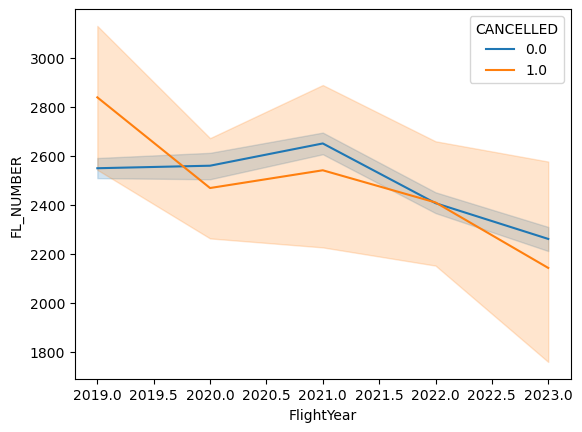

In [264]:
sns.lineplot(x=df['FlightYear'],y=df['FL_NUMBER'],hue=df['CANCELLED'])

#2019 made highest flights cancel,then steap decrease,then after 2020 steapincrease 2021 2nd highest cancelled flights.

<AxesSubplot:xlabel='FlightMonth', ylabel='FL_NUMBER'>

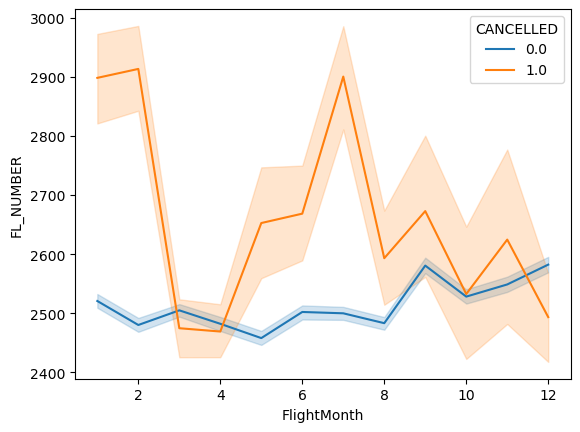

In [148]:
sns.lineplot(x=df['FlightMonth'],y=df['FL_NUMBER'],hue=df['CANCELLED'])

# 6,8  month made =1 flights jast cancel hotat with flightnumber =2900

In [146]:
df.describe()

,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,fl_year,FlightYear,FlightDay,FlightMonth
count,1000000.000000,1000000.000000,974109.000000,974100.000000,973697.000000,973697.000000,973309.000000,973309.000000,1000000.000000,973310.000000,971164.000000,1000000.000000,999996.000000,971164.000000,971164.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000
mean,2514.368097,1327.009355,1329.850402,10.230252,16.643564,1352.325014,1462.334246,7.684553,1490.380500,1466.427488,4.371051,0.026400,142.282337,136.620912,112.304767,809.438099,4.430106,0.727697,2.366996,0.024869,4.550918,2019.0,2020.872602,15.748780,6.239998
std,1748.047672,485.490987,499.017166,49.594297,9.199492,500.632172,527.108282,6.307066,511.326077,531.680288,51.418078,0.160322,71.611746,71.721691,69.810880,588.651135,31.590341,14.111196,15.281955,1.257582,25.492048,0.0,1.414163,8.774116,3.376307
min,1.000000,1.000000,1.000000,-82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-96.000000,0.000000,1.000000,15.000000,8.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.0,2019.000000,1.000000,1.000000
25%,1052.000000,915.000000,917.000000,-6.000000,11.000000,932.000000,1049.000000,4.000000,1107.000000,1053.000000,-16.000000,0.000000,90.000000,84.000000,61.000000,377.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.0,2019.000000,8.000000,3.000000
50%,2155.000000,1320.000000,1322.000000,-2.000000,14.000000,1335.000000,1501.000000,6.000000,1516.000000,1504.000000,-7.000000,0.000000,125.000000,120.000000,95.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.0,2021.000000,16.000000,6.000000
75%,3803.000000,1730.000000,1738.000000,6.000000,19.000000,1752.000000,1908.000000,9.000000,1919.000000,1913.000000,7.000000,0.000000,172.000000,167.000000,142.000000,1046.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.0,2022.000000,23.000000,9.000000
max,8819.000000,2359.000000,2400.000000,2938.000000,181.000000,2400.000000,2400.000000,249.000000,2400.000000,2400.000000,2913.000000,1.000000,695.000000,716.000000,689.000000,5095.000000,2913.000000,1486.000000,1741.000000,291.000000,2096.000000,2019.0,2023.000000,31.000000,12.000000


In [ ]:
#sns.lineplot(x=df['FlightYear'],y=df['FL_NUMBER'],hue=df['CANCELLED'])

In [151]:
df['ORIGIN'].nunique()

380

In [152]:
df['DEST'].nunique()

380

In [15]:
df['CANCELLED'].value_counts()

0.0    973600
1.0     26400
Name: CANCELLED, dtype: int64

In [17]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 257.7/257.7 kB 721.4 kB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 1.6 MB/s eta 0:00:00


In [55]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [19]:
df['AIRLINE_CODE'].value_counts()
# frequncy encoding as different counts for each category
df['AIRLINE_CODE'].value_counts(normalize=True)

WN    0.192402
DL    0.131493
AA    0.127734
OO    0.114995
UA    0.084964
YX    0.047471
MQ    0.040491
9E    0.037657
B6    0.037530
OH    0.035816
AS    0.033470
NK    0.031882
YV    0.021667
F9    0.021255
G4    0.017393
HA    0.010648
QX    0.007026
EV    0.006105
Name: AIRLINE_CODE, dtype: float64

In [140]:
df

,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth,AIRLINE_CODE_en
0,2464,0.049357,0.009904,5.0,21.0,1351.0,1532.0,6.0,-15.0,0.0,0.0,148.0,101.0,746.0,0.0,0.0,0.0,0.0,0.0,2023,9,6,0.083271
1,5390,0.000730,0.018058,-8.0,14.0,606.0,630.0,9.0,-21.0,0.0,0.0,60.0,24.0,89.0,0.0,0.0,0.0,0.0,0.0,2019,30,7,0.114753
2,1326,0.017031,0.029107,-6.0,12.0,1040.0,1117.0,15.0,-8.0,0.0,0.0,66.0,37.0,190.0,0.0,0.0,0.0,0.0,0.0,2019,24,12,0.130733
3,1976,0.012679,0.015887,-3.0,13.0,1404.0,1704.0,11.0,6.0,0.0,0.0,255.0,240.0,1597.0,0.0,0.0,0.0,0.0,0.0,2023,14,6,0.083271
4,5644,0.035313,0.018058,-18.0,10.0,1842.0,2019.0,10.0,-36.0,0.0,0.0,135.0,97.0,726.0,0.0,0.0,0.0,0.0,0.0,2019,22,1,0.114753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29345,1050,0.018072,0.027604,-10.0,28.0,1828.0,1947.0,14.0,2.0,0.0,0.0,109.0,79.0,468.0,0.0,0.0,0.0,0.0,0.0,2020,8,2,0.021397
29346,2921,0.024874,0.035447,-2.0,15.0,1938.0,2125.0,5.0,-5.0,0.0,0.0,190.0,167.0,1105.0,0.0,0.0,0.0,0.0,0.0,2023,4,5,0.193526
29347,1802,0.010120,0.019162,0.0,17.0,1217.0,1908.0,26.0,19.0,0.0,0.0,315.0,291.0,2409.0,0.0,0.0,19.0,0.0,0.0,2021,29,12,0.193526
29348,1960,0.017925,0.018108,53.0,8.0,1531.0,1608.0,3.0,44.0,0.0,0.0,57.0,37.0,191.0,0.0,44.0,0.0,0.0,0.0,2021,27,6,0.083271


# FREQUENCY/PERCENTAGE ENCODING,CATBOOST ENCODING

In [127]:
d = df['AIRLINE_CODE'].value_counts(normalize=True).to_dict()
df['AIRLINE_CODE_en'] = df['AIRLINE_CODE'].map(d)
df.drop(columns='AIRLINE_CODE',axis=1,inplace=True)

In [128]:
import  category_encoders as ce 
def catboost(catin , tar):
    catboo=ce.cat_boost.CatBoostEncoder()
    catboo.fit(catin,tar)
    df_encode=catboo.transform(catin)
    
    return df_encode

In [129]:
df['ORIGIN'] = catboost(df.ORIGIN, df.CANCELLED)
df['DEST'] = catboost(df.DEST, df.CANCELLED)

In [24]:
df['CANCELLATION_CODE'].isnull().sum()

0

In [83]:
df['CANCELLATION_CODE'].value_counts()

0    28676
B      298
A      179
D      153
C       68
Name: CANCELLATION_CODE, dtype: int64

In [130]:
v = df['CANCELLATION_CODE'].value_counts(normalize=True).to_dict()
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].replace({'B': 0.00957, 'D': 0.008212, 'A': 0.006503, 'C': 0.002115})
df['CANCELLATION_CODE'].astype('float')


#d = df['AIRLINE_CODE'].value_counts(normalize=True).to_dict()
#df['AIRLINE_CODE_en'] = df['AIRLINE_CODE'].map(d)
#df.drop(columns='AIRLINE_CODE',axis=1,inplace=True)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
29345    0.0
29346    0.0
29347    0.0
29348    0.0
29349    0.0
Name: CANCELLATION_CODE, Length: 29350, dtype: float64

In [141]:
df.to_csv('Flight_Tej.csv')

In [2]:
df =pd.read_csv('Flight_Tej.csv')
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df

,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth,AIRLINE_CODE_en
0,2464,0.049357,0.009904,5.0,21.0,1351.0,1532.0,6.0,-15.0,0.0,0.0,148.0,101.0,746.0,0.0,0.0,0.0,0.0,0.0,2023,9,6,0.083271
1,5390,0.000730,0.018058,-8.0,14.0,606.0,630.0,9.0,-21.0,0.0,0.0,60.0,24.0,89.0,0.0,0.0,0.0,0.0,0.0,2019,30,7,0.114753
2,1326,0.017031,0.029107,-6.0,12.0,1040.0,1117.0,15.0,-8.0,0.0,0.0,66.0,37.0,190.0,0.0,0.0,0.0,0.0,0.0,2019,24,12,0.130733
3,1976,0.012679,0.015887,-3.0,13.0,1404.0,1704.0,11.0,6.0,0.0,0.0,255.0,240.0,1597.0,0.0,0.0,0.0,0.0,0.0,2023,14,6,0.083271
4,5644,0.035313,0.018058,-18.0,10.0,1842.0,2019.0,10.0,-36.0,0.0,0.0,135.0,97.0,726.0,0.0,0.0,0.0,0.0,0.0,2019,22,1,0.114753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29345,1050,0.018072,0.027604,-10.0,28.0,1828.0,1947.0,14.0,2.0,0.0,0.0,109.0,79.0,468.0,0.0,0.0,0.0,0.0,0.0,2020,8,2,0.021397
29346,2921,0.024874,0.035447,-2.0,15.0,1938.0,2125.0,5.0,-5.0,0.0,0.0,190.0,167.0,1105.0,0.0,0.0,0.0,0.0,0.0,2023,4,5,0.193526
29347,1802,0.010120,0.019162,0.0,17.0,1217.0,1908.0,26.0,19.0,0.0,0.0,315.0,291.0,2409.0,0.0,0.0,19.0,0.0,0.0,2021,29,12,0.193526
29348,1960,0.017925,0.018108,53.0,8.0,1531.0,1608.0,3.0,44.0,0.0,0.0,57.0,37.0,191.0,0.0,44.0,0.0,0.0,0.0,2021,27,6,0.083271


In [143]:
df.isnull().sum()

FL_NUMBER                    0
ORIGIN                       0
DEST                         0
DEP_DELAY                  694
TAXI_OUT                   703
WHEELS_OFF                 703
WHEELS_ON                  715
TAXI_IN                    715
ARR_DELAY                  773
CANCELLED                    0
CANCELLATION_CODE            0
CRS_ELAPSED_TIME             0
AIR_TIME                   773
DISTANCE                     0
DELAY_DUE_CARRIER            0
DELAY_DUE_WEATHER            0
DELAY_DUE_NAS                0
DELAY_DUE_SECURITY           0
DELAY_DUE_LATE_AIRCRAFT      0
FlightYear                   0
FlightDay                    0
FlightMonth                  0
AIRLINE_CODE_en              0
dtype: int64

# handling imbalanced dataset with different methods

1.Centroid based undersampling


2.SMOTE oversampling


3.Ensemble Methods
    
#https://imbalanced-learn.org/stable/references/combine.html

# 1.Centroid based undersampling

In [3]:
df.isnull().sum()

FL_NUMBER                    0
ORIGIN                       0
DEST                         0
DEP_DELAY                  694
TAXI_OUT                   703
WHEELS_OFF                 703
WHEELS_ON                  715
TAXI_IN                    715
ARR_DELAY                  773
CANCELLED                    0
CANCELLATION_CODE            0
CRS_ELAPSED_TIME             0
AIR_TIME                   773
DISTANCE                     0
DELAY_DUE_CARRIER            0
DELAY_DUE_WEATHER            0
DELAY_DUE_NAS                0
DELAY_DUE_SECURITY           0
DELAY_DUE_LATE_AIRCRAFT      0
FlightYear                   0
FlightDay                    0
FlightMonth                  0
AIRLINE_CODE_en              0
dtype: int64

In [43]:
df.describe()

,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth,AIRLINE_CODE_en
count,11733.000000,11733.000000,11733.000000,11454.000000,11450.000000,11450.000000,11445.000000,11445.000000,11419.000000,11733.000000,11733.000000,11733.000000,11419.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000,11733.000000
mean,2487.919714,0.024115,0.024225,10.530906,16.558952,1363.841310,1469.047182,7.717781,4.742359,0.024205,0.000193,141.117106,111.351257,799.981505,4.090088,0.558595,2.539078,0.025739,5.104662,2020.876502,15.798773,6.287821,0.104417
std,1738.137933,0.022132,0.022068,48.632831,9.189966,500.505462,528.899851,6.391845,50.148331,0.153692,0.001259,70.331958,68.762808,576.123877,27.777711,8.521362,16.144457,0.983855,29.528251,1.431647,8.786933,3.393263,0.061177
min,1.000000,0.000336,0.000175,-29.000000,2.000000,3.000000,1.000000,1.000000,-78.000000,0.000000,0.000000,31.000000,10.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,0.005966
25%,1046.000000,0.011185,0.011860,-5.000000,11.000000,941.000000,1053.000000,4.000000,-15.000000,0.000000,0.000000,90.000000,61.000000,374.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,8.000000,3.000000,0.037331
50%,2121.000000,0.021307,0.021844,-2.000000,14.000000,1350.000000,1507.000000,6.000000,-6.000000,0.000000,0.000000,125.000000,94.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,16.000000,6.000000,0.113355
75%,3740.000000,0.032636,0.031319,7.000000,19.000000,1800.000000,1911.000000,9.000000,7.000000,0.000000,0.000000,171.000000,141.000000,1035.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000,23.000000,9.000000,0.136112
max,7431.000000,0.404841,0.341402,1409.000000,143.000000,2400.000000,2400.000000,161.000000,1408.000000,1.000000,0.009570,612.000000,592.000000,5095.000000,1220.000000,317.000000,726.000000,71.000000,1408.000000,2023.000000,31.000000,12.000000,0.197392


# NULL VALUE TREATMENT

In [4]:
df['WHEELS_OFF'] = df['WHEELS_OFF'].fillna(df['WHEELS_OFF'].median())
df['WHEELS_ON'] = df['WHEELS_ON'].fillna(df['WHEELS_ON'].median())
df['TAXI_IN'] = df['TAXI_IN'].fillna(df['TAXI_IN'].median())
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(0)
df['AIR_TIME'] = df['AIR_TIME'].fillna(df['AIR_TIME'].median())
df['TAXI_OUT'] = df['TAXI_OUT'].fillna(np.mean(df['TAXI_OUT']))
#df['DEP_DELAY'] = df['DEP_DELAY'].fillna(stats.mode(df['DEP_DELAY'])[0][0])
df['DEP_DELAY'] = df['DEP_DELAY'].fillna(0)

In [5]:
df.isnull().sum()

FL_NUMBER                  0
ORIGIN                     0
DEST                       0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
ARR_DELAY                  0
CANCELLED                  0
CANCELLATION_CODE          0
CRS_ELAPSED_TIME           0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
FlightYear                 0
FlightDay                  0
FlightMonth                0
AIRLINE_CODE_en            0
dtype: int64

In [6]:
X = df.drop(["CANCELLED"],axis=1)
y =df['CANCELLED']

# CLUSTER CENTROID UNDERSAMPLING

In [7]:
from imblearn.under_sampling import ClusterCentroids 
from collections import Counter
cc = ClusterCentroids(random_state=42)
print('Original dataset shape %s' % Counter(y))
X_res, y_res = cc.fit_resample(X, y)
print('After undersample dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0.0: 28643, 1.0: 707})
After undersample dataset shape Counter({0.0: 707, 1.0: 707})


In [149]:
X_res.columns

Index(['FL_NUMBER', 'ORIGIN', 'DEST', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY', 'CANCELLATION_CODE',
       'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear', 'FlightDay', 'FlightMonth',
       'AIRLINE_CODE_en'],
      dtype='object')

In [8]:
X_out = X_res[['FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY', 
       'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear', 'FlightDay', 'FlightMonth']]

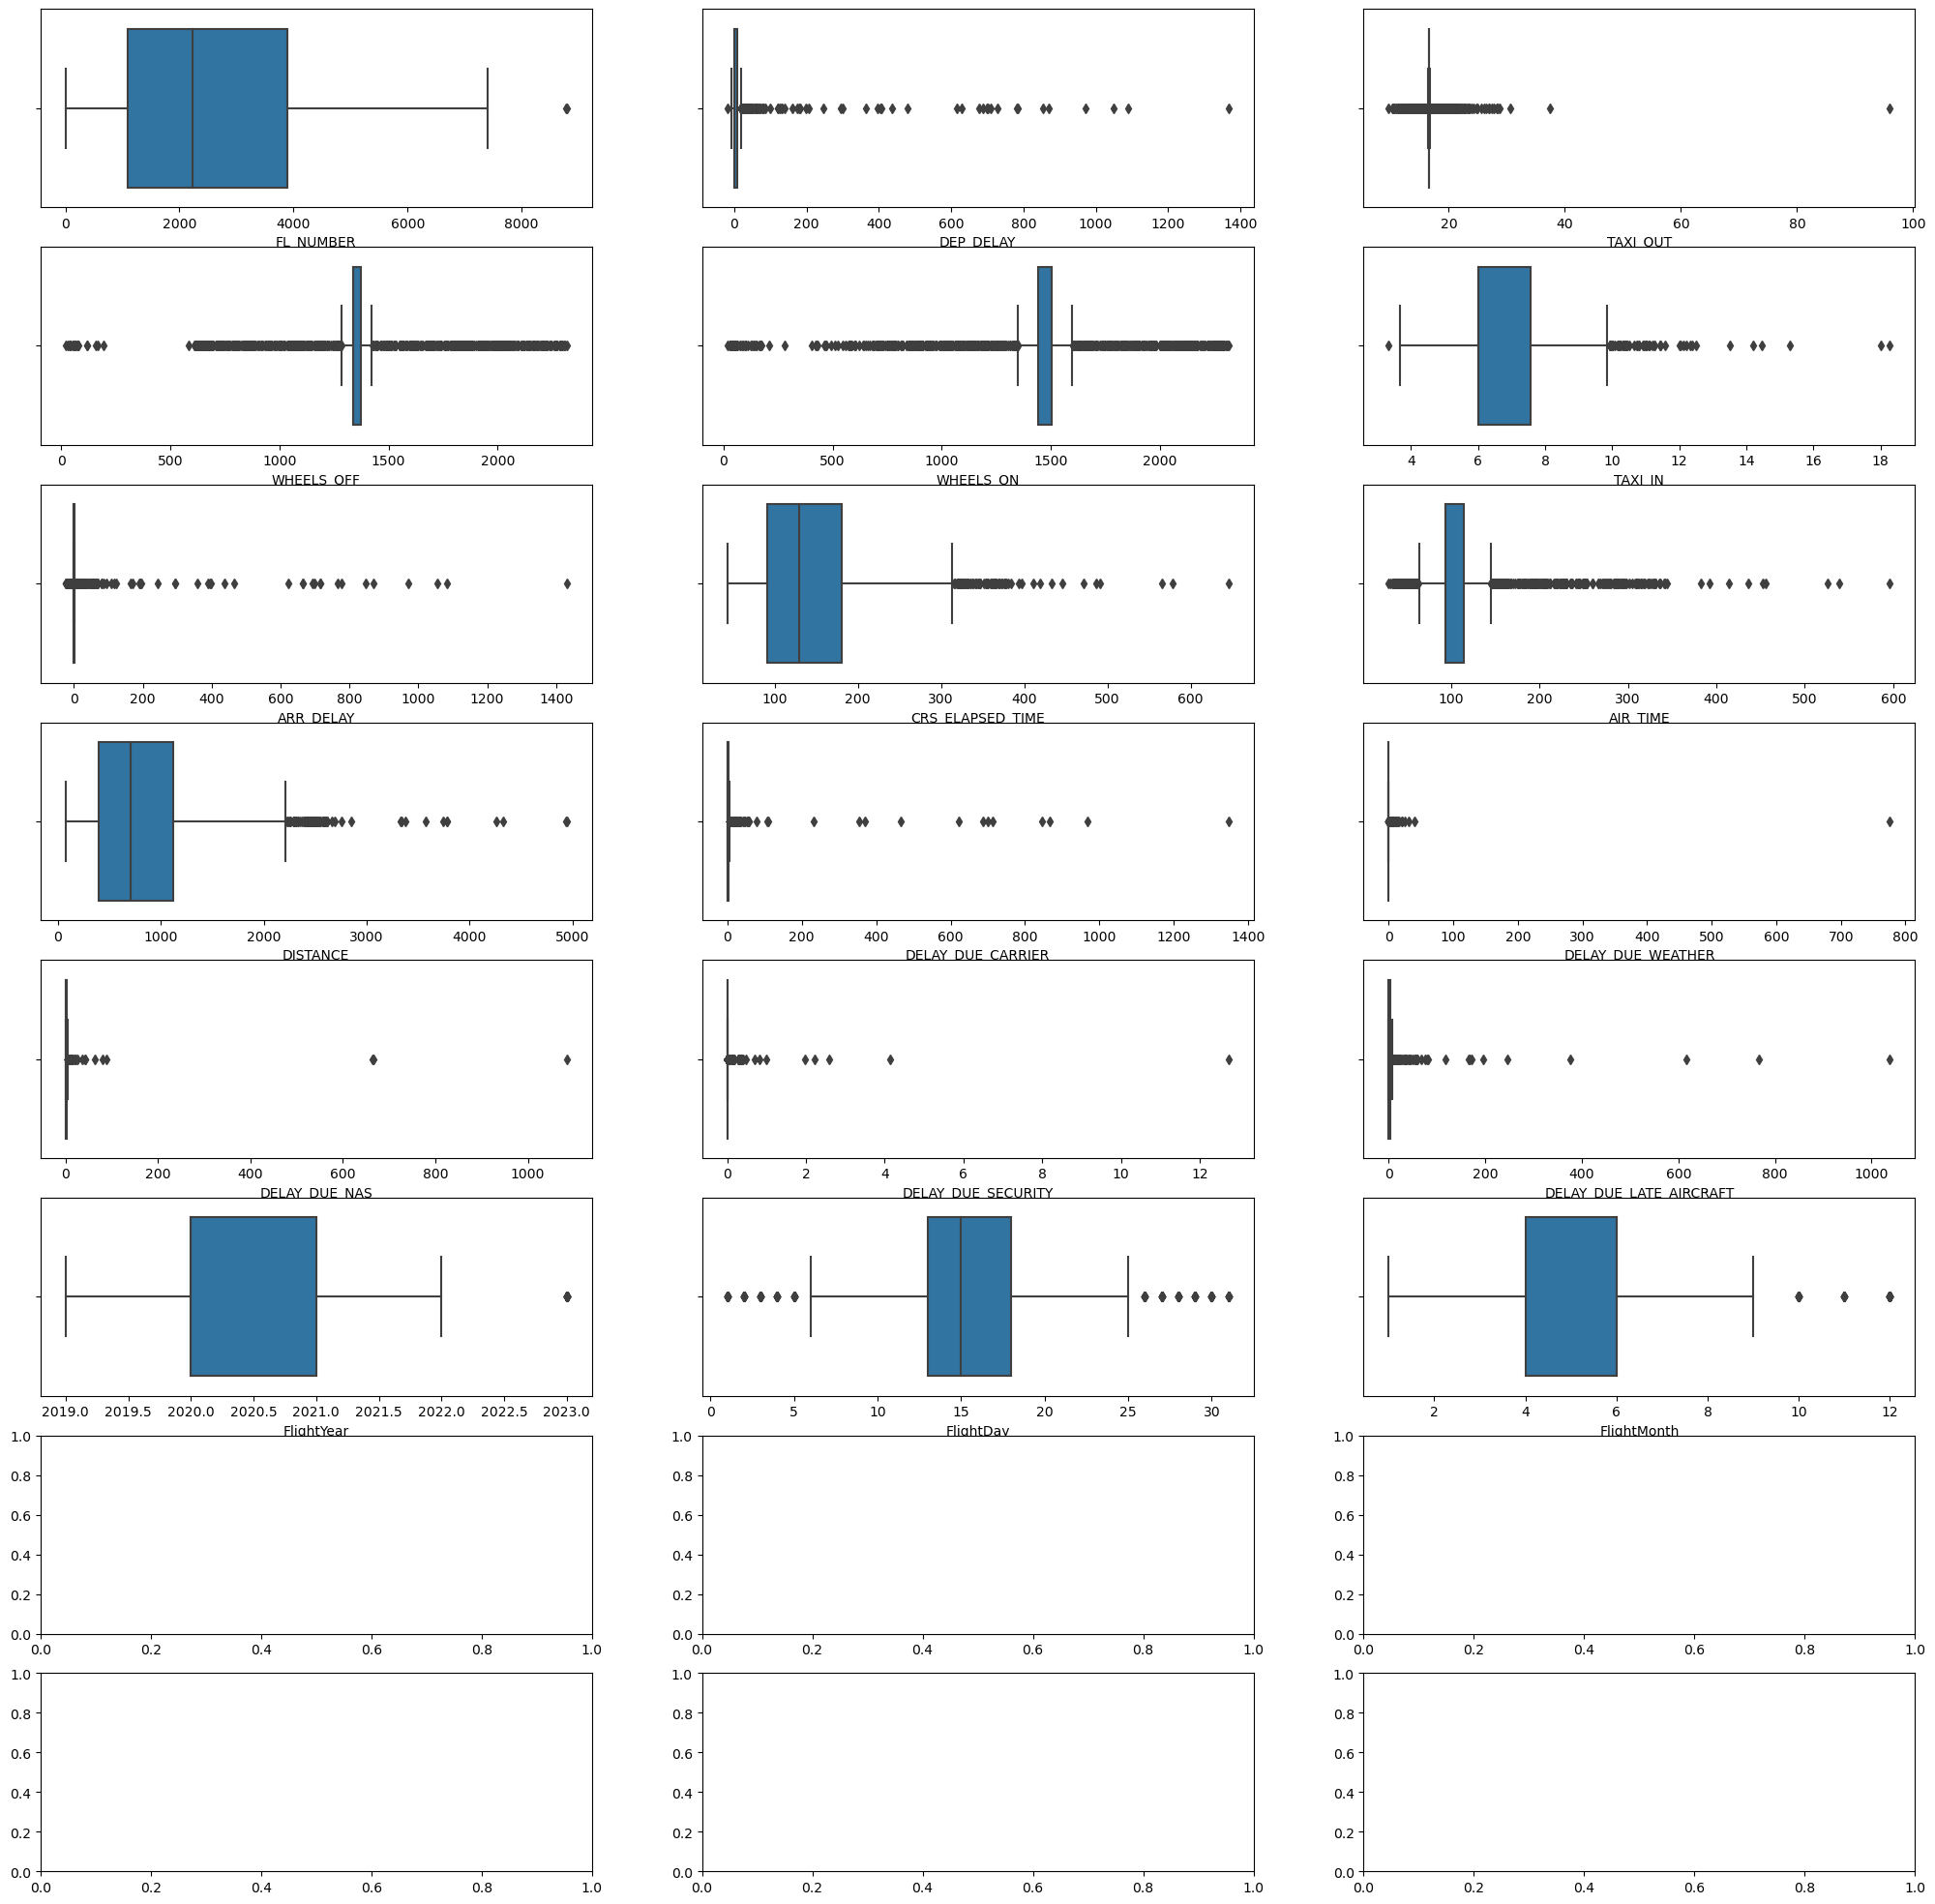

In [9]:
fig, ax=plt.subplots(8,3,figsize=(25,25))
for var, subplot in zip(X_out,ax.flatten()):
    
    sns.boxplot(x=X_out[var],ax=subplot)

plt.show()

C:\Users\Lalit\AppData\Local\Temp\ipykernel_10568\1235594124.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_out[i]=X_out[i].apply(lambda x:l if x<l else u if x>u else x)


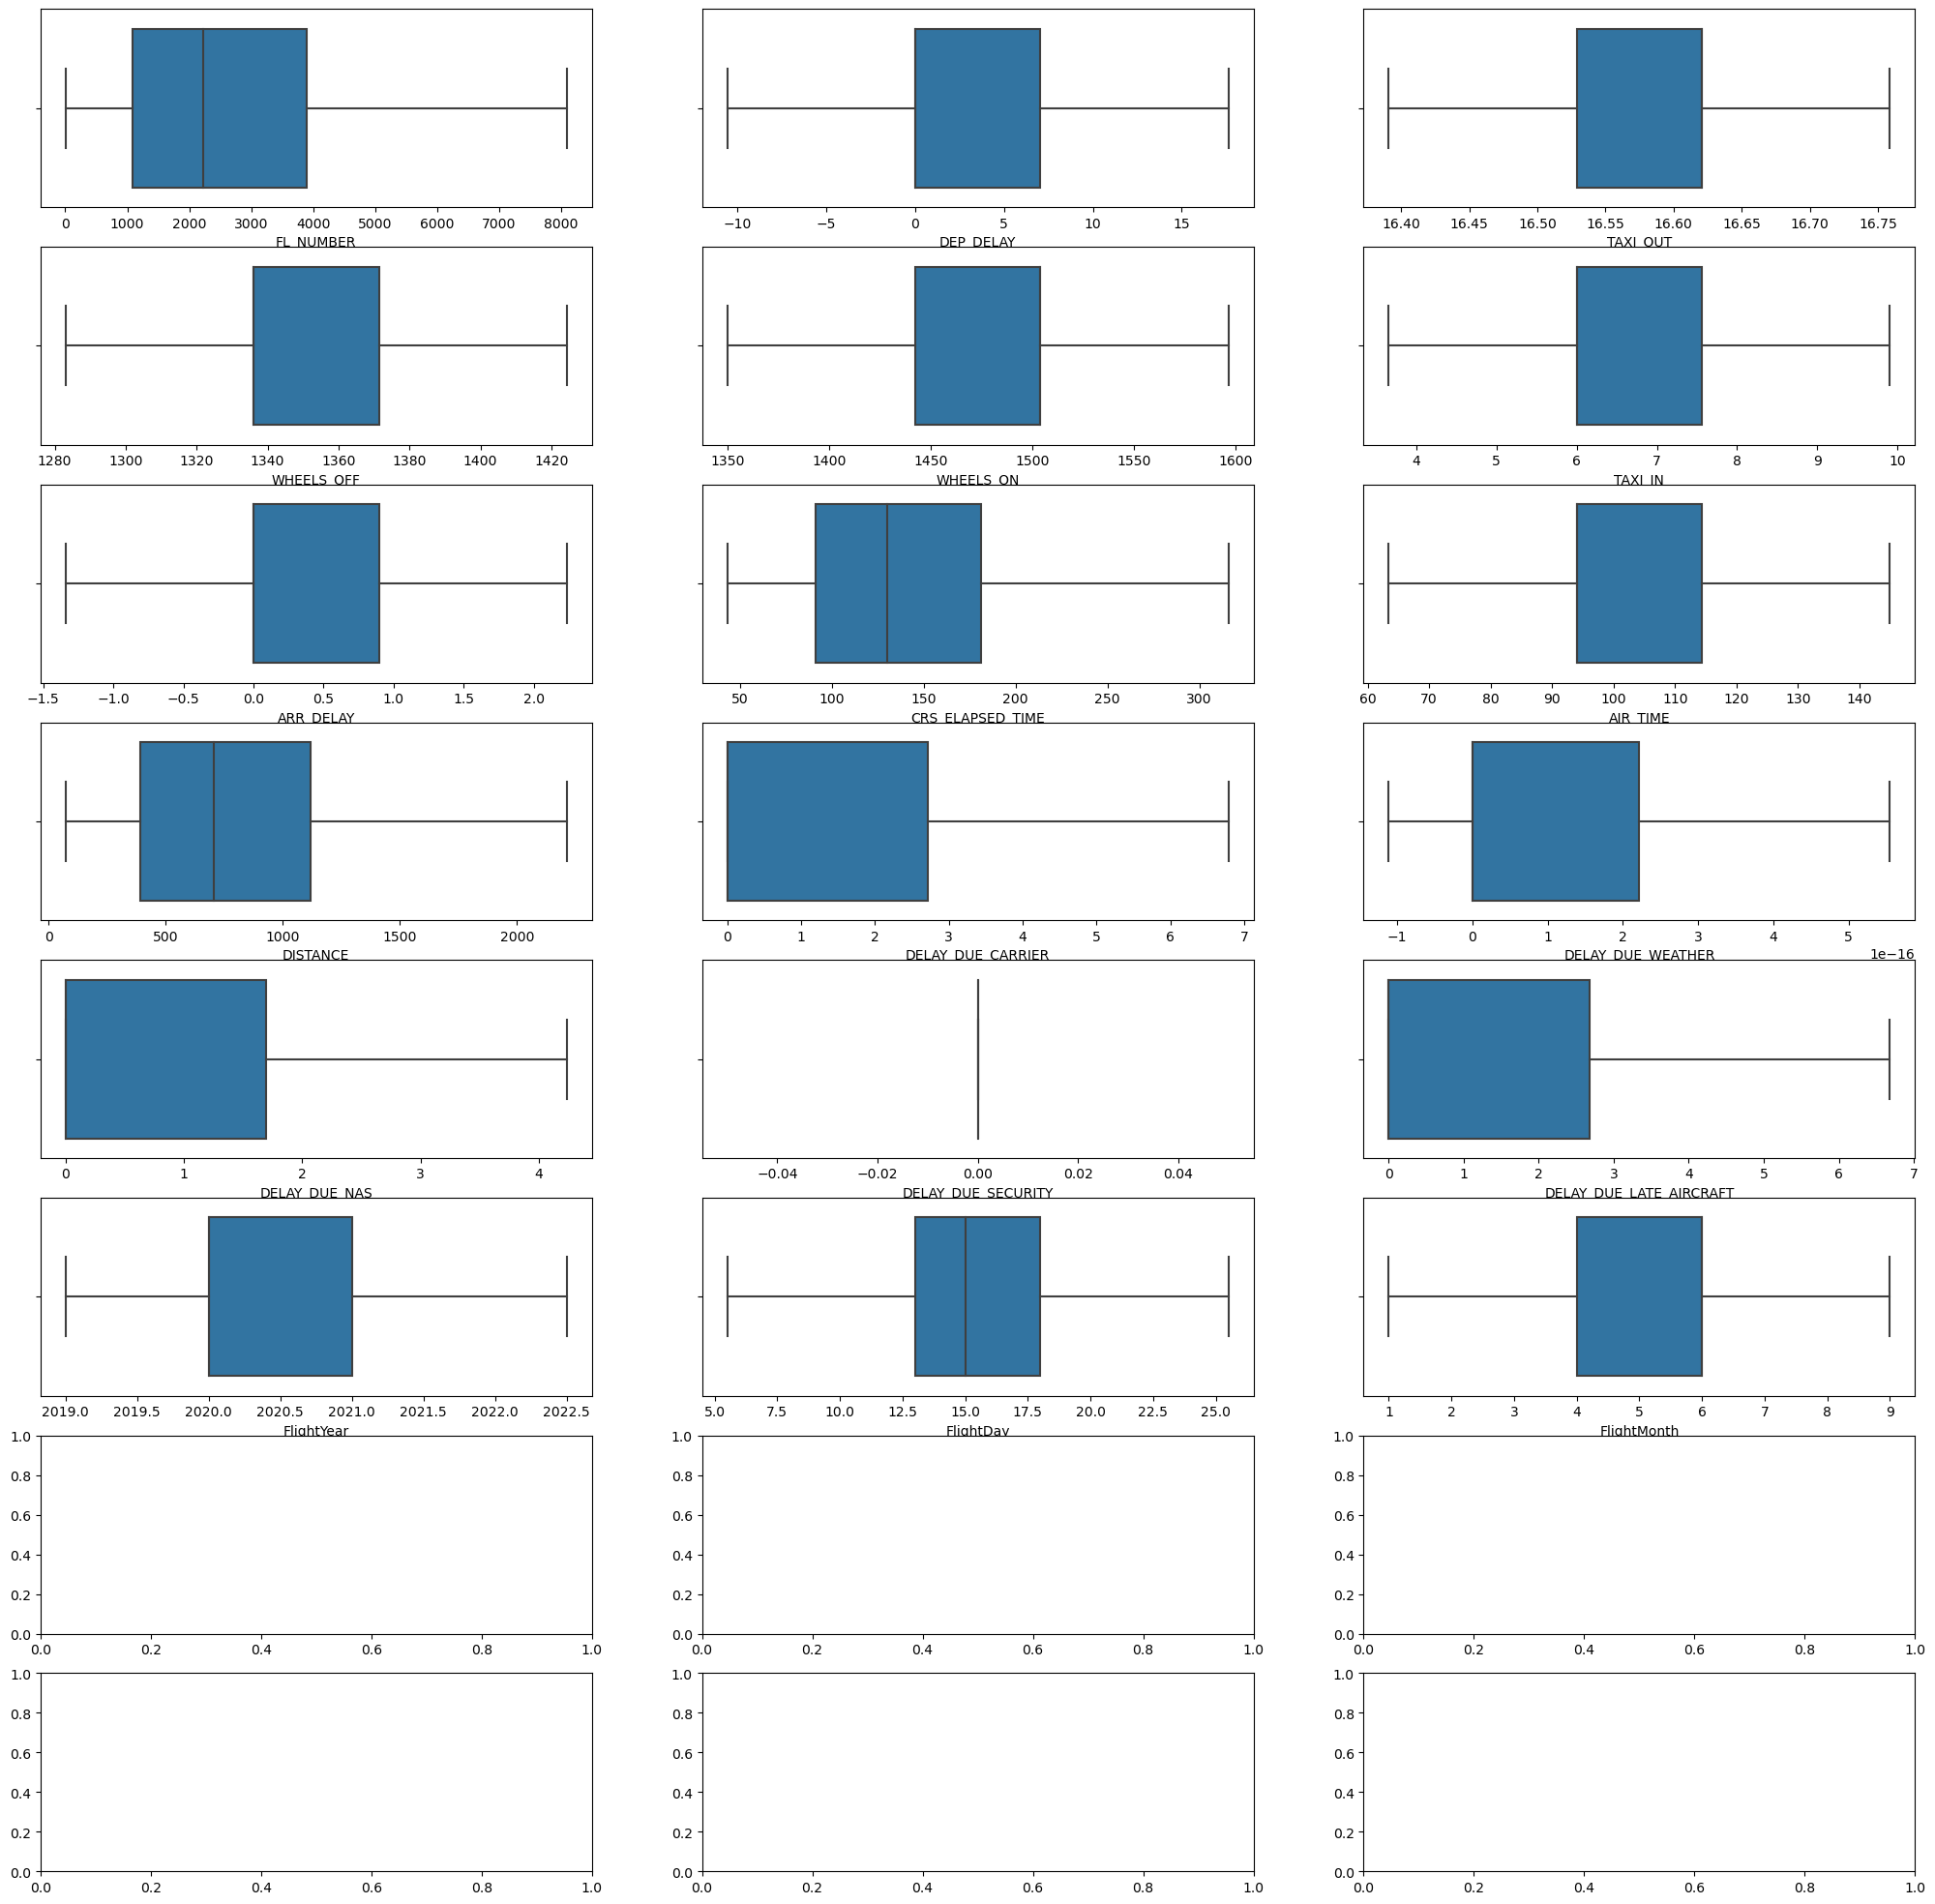

In [10]:
for i in X_out:
    q1=X_out[i].quantile(0.25)
    q3=X_out[i].quantile(0.75)
    iqr=q3-q1
    u=q3+(1.5*iqr)
    l=q1-(1.5*iqr)
    X_out[i]=X_out[i].apply(lambda x:l if x<l else u if x>u else x)

    
fig, ax=plt.subplots(8,3,figsize=(25,25))
for var, subplot in zip(X_out,ax.flatten()):
    
    sns.boxplot(x=X_out[var],ax=subplot)

plt.show()

In [12]:
X_res = pd.concat((X_res[['ORIGIN','DEST','CANCELLATION_CODE','AIRLINE_CODE_en']]  ,X_out),axis=1)

In [234]:
import warnings
warnings.filterwarnings('ignore')

# FEATURE SELECTION USING RFE

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV


dt = DecisionTreeClassifier()

rfe_mod = RFECV(dt,min_features_to_select = 10) 
myvalues= rfe_mod.fit(X_res,y_res)

In [14]:
myvalues.support_
myvalues.ranking_ 

print("Num Features: %s" % (myvalues.n_features_))
print("Selected Features: %s" % (myvalues.support_))
print("Feature Ranking: %s" % (myvalues.ranking_))  

Num Features: 10
Selected Features: [False False  True False False False False False False  True False False
 False False  True  True  True  True  True  True  True  True]
Feature Ranking: [13 12  1  7  6  5  4  3  2  1  9 11 10  8  1  1  1  1  1  1  1  1]


In [221]:
myvalues.feature_names_in_

array(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en',
       'FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear',
       'FlightDay', 'FlightMonth'], dtype=object)

In [307]:
# FEATURES SELECTED BY RFE

X_res_feat_sel = X_res[['CANCELLATION_CODE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear',
       'FlightDay', 'FlightMonth','TAXI_IN']]

# MODEL FITTING ON BALANCED DATA WITH FEATURE SELECTION

In [23]:
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X_res_feat_sel, y_res,
                                                    random_state=0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
def performance(model):
        model.fit(X_train, y_train) 
        y_pred_tr = model.predict(X_train)
        y_pred_tst = model.predict(X_test)
        print(classification_report(y_train, y_pred_tr))
        print(classification_report(y_test, y_pred_tst))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'weights': ['uniform','distance'],
    'algorithm':['auto'],
    'leaf_size' : [40,50],
    'p':[1,2],
    'n_neighbors':[6,10,15]
}
grid_search = GridSearchCV(estimator=kn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
k = grid_search.best_estimator_

In [197]:
k

KNeighborsClassifier(leaf_size=40, n_neighbors=6, p=1, weights='distance')

In [27]:
kn = KNeighborsClassifier(n_neighbors=6,weights='distance', leaf_size=40)
performance(kn)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       526
         1.0       1.00      1.00      1.00       534

    accuracy                           1.00      1060
   macro avg       1.00      1.00      1.00      1060
weighted avg       1.00      1.00      1.00      1060

              precision    recall  f1-score   support

         0.0       0.93      0.59      0.72       181
         1.0       0.69      0.95      0.80       173

    accuracy                           0.77       354
   macro avg       0.81      0.77      0.76       354
weighted avg       0.81      0.77      0.76       354



In [236]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver':['lbfgs', 'liblinear'],
    'max_iter' : range(80,100),
    'tol':[0.1,0.5],
    'C': [0.7,1] }
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
regul_lr = grid_search.best_estimator_

In [244]:
regul_lr

LogisticRegression(C=0.7, dual=True, solver='liblinear', tol=0.1)

In [245]:
regul_lr
lr = LogisticRegression(penalty='l2',solver='liblinear',tol=0.1,C=0.7,dual=True)
performance(lr)

              precision    recall  f1-score   support

         0.0       0.99      0.51      0.67       526
         1.0       0.67      0.99      0.80       534

    accuracy                           0.75      1060
   macro avg       0.83      0.75      0.74      1060
weighted avg       0.83      0.75      0.74      1060

              precision    recall  f1-score   support

         0.0       0.99      0.48      0.64       181
         1.0       0.64      0.99      0.78       173

    accuracy                           0.73       354
   macro avg       0.82      0.73      0.71       354
weighted avg       0.82      0.73      0.71       354



# final model is sklearn logistic regression model as its performing better than
# KNN,also bussiness interpretation wise logistic regression is  good 

In [247]:
lr.coef_

array([[ 3.06991583e-04,  4.21005758e-04,  1.90617184e-04,
         1.91914115e-05,  2.54014094e-03, -1.65010607e-01,
         2.44577070e-03, -1.83910613e-01,  1.16893752e-01,
        -3.70158605e-02, -1.03349625e-02,  7.25770230e-03,
        -1.19207180e-01, -1.30099671e-04, -7.26452242e-02,
        -7.20232110e-18, -4.65982834e-02,  0.00000000e+00,
        -7.07428623e-02,  4.15532462e-02, -6.92443544e-03,
        -1.49483091e-02]])

In [248]:
lr.feature_names_in_

array(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en',
       'FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear',
       'FlightDay', 'FlightMonth'], dtype=object)

# WRITE BUSINESS INTERPARTION FROM ABOVE COEFFICIENTSIN REPORT

# AS BASIC MODELS ARE OVERFITTING,HENCE ENSEMBLE,BAGGING,BOOSTING,TREE BASED ALGO'S NOT USED HERE